In [8]:
# Load the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

# Load the datasets into a Pandas DataFrame.
winequality_data = pd.read_csv("winequality.csv", delimiter=";")
camera_data = pd.read_csv("camera.csv", delimiter=",")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB

First Five Rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0

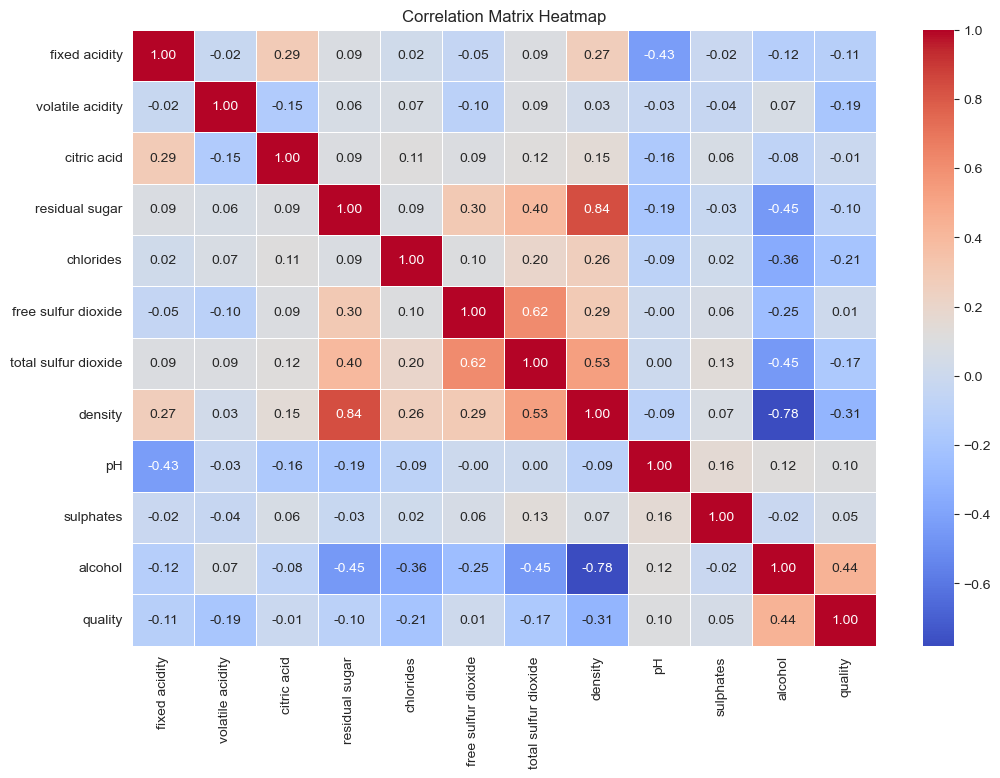

In [7]:
# QUESTION 1: MULTIPLE LINEAR REGRESSION
# LOAD AND EXPLORE THE DATASET
# Display the first five rows, column names, and data types.
print("Dataset Info:")
winequality_data.info()
print("\nFirst Five Rows:")
print(winequality_data.head())

# Print summary statistics
print("\nSummary Statistics:")
print(winequality_data.describe())

# Identify and handle missing values (if any).
print("\nMissing Values:")
print(winequality_data.isnull().sum())

# Compute the correlation matrix between variables.
corr_matrix = winequality_data.corr()

# Create a heatmap visualization using Seaborn.
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Provide a preliminary discussion about key relationships in the data (eg. which variables are highly correlated?)
print("\nPreliminary discussion about key relationships in the data.")
print("1. Alcohol vs. Quality: Strongest positive correlation (~0.44). Higher alcohol content is associated with better wine quality.")
print("2. Density vs. Alcohol: Strong negative correlation (~-0.69). Denser wines tend to have lower alcohol content.")
print("3. Total Sulfur Dioxide vs. Free Sulfur Dioxide: Highly correlated (~0.72). Total sulfur dioxide largely depends on free sulfur dioxide levels.")
print("4. Residual Sugar vs. Density: Moderate positive correlation (~0.55). Sweeter wines tend to be denser.")
print("5. Volatile Acidity vs. Quality: Noticeable negative correlation (~-0.26). Higher volatile acidity generally leads to lower wine quality.")

In [ ]:
# PERFORMING MULTIPLE LINEAR REGRESSION (MLR)
